In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error

In [2]:
# Load the dataset
data = pd.read_csv('DS_ML Coding Challenge Dataset (1).xlsx - Training Dataset.csv') 
data_test = pd.read_csv('DS_ML Coding Challenge Dataset (1).xlsx - Test Dataset.csv')

In [3]:
data

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,May-21,10.16
1,NTM2,X1,A9,DIRECT,Large,Powder,Oct-20,134.28
2,NTM3,X2,A20,DIRECT,Large,Powder,Dec-20,12.46
3,NTM3,X1,A18,WHOLESALE,Small,Powder,Feb-21,107.22
4,NTM2,X1,A28,DIRECT,Large,Liquid,Nov-20,197.76
...,...,...,...,...,...,...,...,...
550171,NTM2,X1,A5,DIRECT,Large,Powder,Jul-20,136.47
550172,NTM3,X1,A14,DIRECT,Large,Liquid,Oct-20,72.56
550173,NTM2,X1,A5,DIRECT,Small,Powder,Mar-21,147.64
550174,NTM2,X1,A7,DIRECT,Small,Powder,Feb-21,150.04


In [4]:
# data_test.drop(['Sourcing Cost'],axis=1,inplace=True)

In [5]:
data_test

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM1,X1,A1,DIRECT,Small,Powder,Jun-21,103.68
1,NTM1,X1,A10,DIRECT,Large,Powder,Jun-21,155.75
2,NTM1,X1,A10,ECOM,Large,Powder,Jun-21,143.02
3,NTM1,X1,A11,DIRECT,Large,Powder,Jun-21,139.39
4,NTM1,X1,A2,DIRECT,Large,Powder,Jun-21,169.42
...,...,...,...,...,...,...,...,...
91,NTM3,X1,A44,DIRECT,Small,Liquid,Jun-21,89.57
92,NTM3,X1,A8,DIRECT,Large,Powder,Jun-21,114.57
93,NTM3,X1,A8,DIRECT,Small,Powder,Jun-21,111.26
94,NTM3,X2,A20,DIRECT,Large,Powder,Jun-21,32.32


In [6]:
data_test.isnull().sum()

ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64

In [7]:
# Convert 'Month of Sourcing' column to datetime using a custom format
# data_test['Month of Sourcing'] = pd.to_datetime(data['Month of Sourcing'], format='%b-%y', errors='coerce')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550176 entries, 0 to 550175
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ProductType        550176 non-null  object 
 1   Manufacturer       550176 non-null  object 
 2   Area Code          550176 non-null  object 
 3   Sourcing Channel   550176 non-null  object 
 4   Product Size       550176 non-null  object 
 5   Product Type       550176 non-null  object 
 6   Month of Sourcing  550176 non-null  object 
 7   Sourcing Cost      550176 non-null  float64
dtypes: float64(1), object(7)
memory usage: 33.6+ MB


In [9]:
data.describe()

,Sourcing Cost
count,550176.000000
mean,108.817286
std,104.390093
min,-196.070000
25%,57.000000
50%,132.000000
75%,146.150000
max,32632.500000


In [10]:
data

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,May-21,10.16
1,NTM2,X1,A9,DIRECT,Large,Powder,Oct-20,134.28
2,NTM3,X2,A20,DIRECT,Large,Powder,Dec-20,12.46
3,NTM3,X1,A18,WHOLESALE,Small,Powder,Feb-21,107.22
4,NTM2,X1,A28,DIRECT,Large,Liquid,Nov-20,197.76
...,...,...,...,...,...,...,...,...
550171,NTM2,X1,A5,DIRECT,Large,Powder,Jul-20,136.47
550172,NTM3,X1,A14,DIRECT,Large,Liquid,Oct-20,72.56
550173,NTM2,X1,A5,DIRECT,Small,Powder,Mar-21,147.64
550174,NTM2,X1,A7,DIRECT,Small,Powder,Feb-21,150.04


In [25]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def preprocess_data(data):
    # Label Encoding for categorical variables
    label_encoder = LabelEncoder()
    data['ProductType'] = label_encoder.fit_transform(data['ProductType'])
    data['Manufacturer'] = label_encoder.fit_transform(data['Manufacturer'])
    data['Area Code'] = label_encoder.fit_transform(data['Area Code'])
    data['Sourcing Channel'] = label_encoder.fit_transform(data['Sourcing Channel'])
    data['Product Size'] = label_encoder.fit_transform(data['Product Size'])
    data['Product Type'] = label_encoder.fit_transform(data['Product Type'])
    data['Month of Sourcing'] = label_encoder.fit_transform(data['Month of Sourcing'])

    # Datetime conversion
    # data['Month of Sourcing'] = pd.to_datetime(data['Month of Sourcing'], format='%b-%y')
    # Convert float to int
    data['Sourcing Cost'] = data['Sourcing Cost'].astype(int)
    

    # Convert datetime to integer representation
    # data['Month of Sourcing'] = data['Month of Sourcing'].apply(lambda x: x.timestamp())

    # Convert to integer
    # data['Month of Sourcing'] = data['Month of Sourcing'].astype(int)
    
    return data

# Example usage:
# train_data = preprocess_data(train_data)
# test_data = preprocess_data(test_data)


In [26]:
train_data = preprocess_data(data)

# Confirm the changes

In [27]:
train_data

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,2,0,19,3,1,1,10,10
1,1,0,44,0,1,1,3,134
2,2,1,12,0,1,1,5,12
3,2,0,9,3,2,1,7,107
4,1,0,19,0,1,0,4,197
...,...,...,...,...,...,...,...,...
550171,1,0,40,0,1,1,0,136
550172,2,0,5,0,1,0,3,72
550173,1,0,40,0,2,1,8,147
550174,1,0,42,0,2,1,7,150


In [28]:
test_data = preprocess_data(data_test)

In [29]:

test_data 

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,0,0,0,0,2,1,0,103
1,0,0,1,0,1,1,0,155
2,0,0,1,1,1,1,0,143
3,0,0,2,0,1,1,0,139
4,0,0,11,0,1,1,0,169
...,...,...,...,...,...,...,...,...
91,2,0,37,0,2,0,0,89
92,2,0,43,0,1,1,0,114
93,2,0,43,0,2,1,0,111
94,2,1,12,0,1,1,0,32


In [30]:
print(test_data.dtypes)

ProductType          int64
Manufacturer         int64
Area Code            int64
Sourcing Channel     int64
Product Size         int64
Product Type         int64
Month of Sourcing    int64
Sourcing Cost        int32
dtype: object


In [31]:
test_data

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,0,0,0,0,2,1,0,103
1,0,0,1,0,1,1,0,155
2,0,0,1,1,1,1,0,143
3,0,0,2,0,1,1,0,139
4,0,0,11,0,1,1,0,169
...,...,...,...,...,...,...,...,...
91,2,0,37,0,2,0,0,89
92,2,0,43,0,1,1,0,114
93,2,0,43,0,2,1,0,111
94,2,1,12,0,1,1,0,32


In [18]:
correlation_matrix = train_data.corr()

In [19]:
correlation_matrix

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
ProductType,1.000000,-0.153839,-0.148129,0.288780,0.076104,-0.075945,-0.013265,-0.134013
Manufacturer,-0.153839,1.000000,0.052805,0.265495,-0.131188,0.010230,-0.007273,-0.221592
Area Code,-0.148129,0.052805,1.000000,-0.019850,-0.122287,-0.075162,0.004917,0.087712
Sourcing Channel,0.288780,0.265495,-0.019850,1.000000,-0.094251,0.084381,0.101935,-0.064848
Product Size,0.076104,-0.131188,-0.122287,-0.094251,1.000000,0.159985,-0.011080,-0.013643
Product Type,-0.075945,0.010230,-0.075162,0.084381,0.159985,1.000000,-0.000369,0.072347
Month of Sourcing,-0.013265,-0.007273,0.004917,0.101935,-0.011080,-0.000369,1.000000,0.056860
Sourcing Cost,-0.134013,-0.221592,0.087712,-0.064848,-0.013643,0.072347,0.056860,1.000000


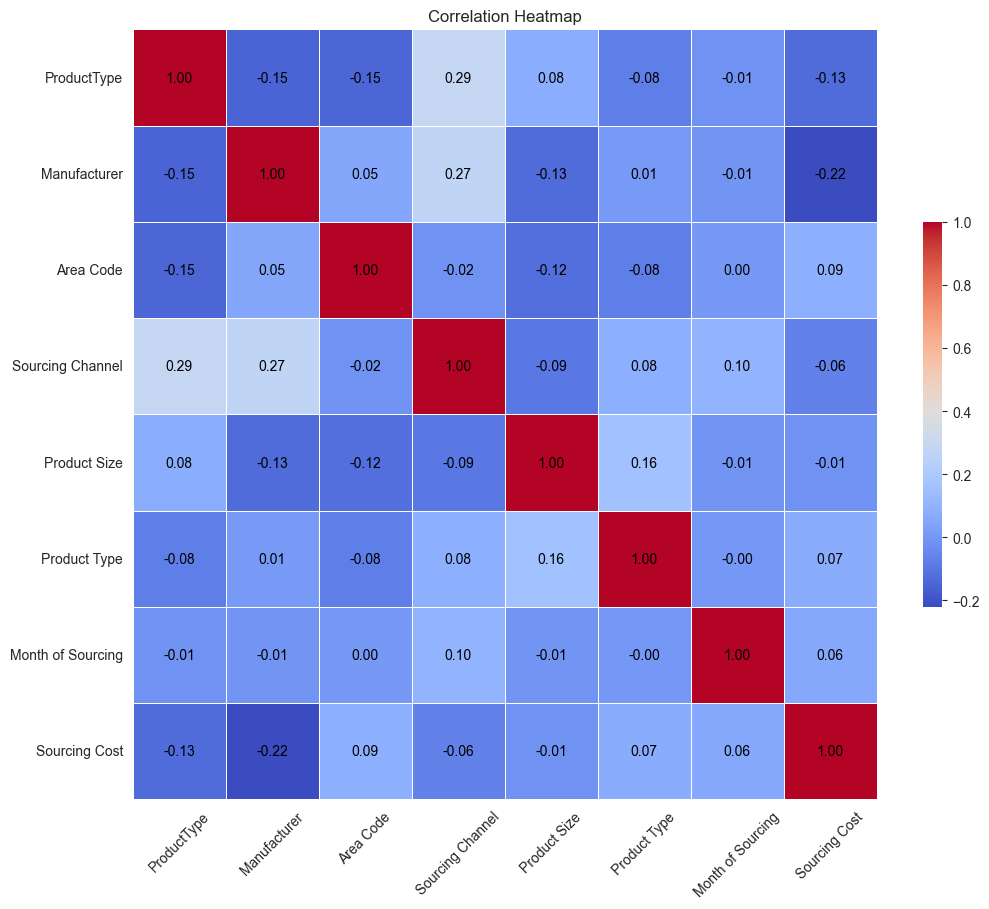

In [35]:
# Plot the heatmap
plt.figure(figsize=(12, 10))  # Adjust the figure size
heatmap = sns.heatmap(correlation_matrix, cmap='coolwarm',
            linewidths=.5, cbar_kws={"shrink": .5}, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)

# Annotate each box with its corresponding value
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        heatmap.text(j+0.5, i+0.5, '{:.2f}'.format(correlation_matrix.iloc[i, j]),
                     ha='center', va='center', color='black')

plt.title('Correlation Heatmap')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.yticks(rotation=0)   # Rotate y-axis labels for better visibility
plt.show()

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming you've already preprocessed the data and encoded categorical variables, and converted 'Month of Sourcing' to integers
# Split the data into features (X) and target variable (y)
X = train_data.drop(['Sourcing Cost'], axis=1)
y = train_data['Sourcing Cost']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
print("Mean Squared Error on Validation Set:", mse)


Mean Squared Error on Validation Set: 3052.265010567455


In [33]:
y_pred

array([153.24120212, 146.87467016,  24.36616755, ...,  24.        ,
       150.19475094, 174.        ])

In [34]:
from sklearn.metrics import r2_score

# Evaluate the model
r2 = r2_score(y_val, y_pred)
print("R^2 Score on Validation Set:", r2)


R^2 Score on Validation Set: 0.4631695997215839


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

# Assuming you've already preprocessed the data and encoded categorical variables, and converted 'Month of Sourcing' to integers
# Split the data into features (X) and target variable (y)
X = train_data.drop(['Sourcing Cost'], axis=1)
y = train_data['Sourcing Cost']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to LightGBM Dataset format
train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_val, label=y_val, reference=train_data)

# Define LightGBM parameters
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'early_stopping_rounds': 10,  # Specify early stopping rounds here
    'verbose': -1
}

# Train the LightGBM model
num_rounds = 200
model01 = lgb.train(params, train_data, num_rounds, valid_sets=[val_data])

# Predict on validation set
y_pred01 = model01.predict(X_val, num_iteration=model01.best_iteration)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_val, y_pred01) ** 0.5
print("Root Mean Squared Error on Validation Set:", rmse)


Root Mean Squared Error on Validation Set: 51.95187996278287


In [24]:
y_pred01

array([148.45224143, 146.65762615,  27.21102334, ...,  26.79767896,
       152.16411646, 171.46712925])

In [20]:
mse = mean_squared_error(y_val, y_pred01)
print("Mean Squared Error on Validation Set:", mse)

Mean Squared Error on Validation Set: 2698.9978316674


In [22]:
mae = mean_absolute_error(y_val, y_pred01)
print("Mean absolute on Validation Set:", mae)

Mean absolute on Validation Set: 14.602398706628302


In [19]:
test_source= test_data['Sourcing Cost']

In [20]:
test_source

0     103
1     155
2     143
3     139
4     169
     ... 
91     89
92    114
93    111
94     32
95     40
Name: Sourcing Cost, Length: 96, dtype: int32

In [21]:
# test_data.drop(['Sourcing Cost'],axis=1,inplace=True)
test_data.drop(['Sourcing Cost'], axis=1,inplace=True)


In [22]:
X

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing
0,2,0,19,3,1,1,1619827200
1,1,0,44,0,1,1,1601510400
2,2,1,12,0,1,1,1606780800
3,2,0,9,3,2,1,1612137600
4,1,0,19,0,1,0,1604188800
...,...,...,...,...,...,...,...
550171,1,0,40,0,1,1,1593561600
550172,2,0,5,0,1,0,1601510400
550173,1,0,40,0,2,1,1614556800
550174,1,0,42,0,2,1,1612137600


In [28]:
# Load the test dataset

# Make predictions on the test data (assuming model is already trained)
test_predictions = model01.predict(test_data)

# Print test predictions
print("Test Predictions:")
print(test_predictions)

Test Predictions:
[108.07960591 150.88478116 150.88478116 146.72832456 163.27772136
 171.46712925  58.39003615  67.03127287 146.17992614 143.97128208
 143.64915342 136.06455038 101.29217653 142.19250828 146.48913643
 147.53019824 147.0131929  146.75233596 145.98830415 148.72700768
 148.40430886 148.72700768 148.40430886  25.22355117  78.44783173
  39.40392406  28.23415618  27.68487312  27.21102334 214.47008067
 181.88204079 163.61577574  30.61890689  31.700905    61.53485147
 147.97159557 152.84502777 148.25913814 145.0107699  161.18581776
  59.67276229  74.45610611 167.73485866 166.21186887 132.50660804
  53.64307205 204.69214425 201.5876138  101.1550652   73.34749358
  78.98849276 142.09561819 113.34016581  84.67326666 178.10757465
 148.57868569 178.10757465 193.62400939 204.52945306 144.682103
 143.31485603 146.65762615 145.89359434 146.57240368 146.37839328
 147.36697764 146.13841794 146.64159281 145.877561   148.72700768
 148.22695944 100.91479357  69.00591867  46.9822021   48.858

In [25]:
import numpy as np

# Assuming original values are stored in 'original_values'
original_values = test_source  # Replace [...] with your original values

# Calculate Mean Squared Error (MSE)
rmse = np.sqrt(np.mean((test_predictions - original_values) ** 2))
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 32.200055575862834


In [26]:
test_predictions.shape

(96,)

In [228]:
# Take input from the user
user_input = {}
user_input['ProductType'] = input("Enter Product Type: ")
user_input['Manufacturer'] = input("Enter Manufacturer: ")
user_input['Area Code'] = input("Enter Area Code: ")
user_input['Sourcing Channel'] = input("Enter Sourcing Channel: ")
user_input['Product Size'] = input("Enter Product Size: ")
user_input['Product Type'] = input("Enter Product Type: ")
user_input['Month of Sourcing'] = input("Enter Month of Sourcing (in format YYYY-MM-DD or MM-YYYY): ")

# Create a DataFrame from user input
user_df = pd.DataFrame([user_input])

# Preprocess the user input
user_df_preprocessed = preprocess_data(user_df)

# Drop 'Sourcing Cost' column
# user_df_preprocessed = user_df_preprocessed.drop('Sourcing Cost', axis=1)

# Make predictions on the preprocessed user data
test_predictions = model.predict(user_df_preprocessed)

# Print test predictions
print("Test Predictions:")
print(test_predictions)


ValueError: unconverted data remains when parsing with format "%b-%y": "21", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [29]:
!pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 162.5 kB/s eta 0:10:14
   ---------------------------------------- 0.0/99.8 MB 279.3 kB/s eta 0:05:58
   ---------------------------------------- 0.1/99.8 MB 476.3 kB/s eta 0:03:30
   ---------------------------------------- 0.2/99.8 MB 841.6 kB/s eta 0:01:59
   ---------------------------------------- 0.3/99.8 MB 1.1 MB/s eta 0:01:30
   ---------------------------------------- 0.5/99.8 MB 1.6 MB/s eta 0:01:01
   ---------------------------------------- 0.7/99.8 MB 2.0 MB/s eta 0:00:51
   ---------------------------------------- 0.8/99.8 MB 2.0 MB/s eta 0:00:51
   ----------------------------